Import Data (Make sure the data is in kW and kWh)

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a numpy array ##HERE##
generationRaw = np.loadtxt('windExample.csv', delimiter=',') #<----- did you put the correct data file for renewable generation?
if (len(generationRaw) == 8760 or len(generationRaw) == 8784):
    print("data is good!")
else:
    print("check data again")
assert (len(generationRaw) == 8760 or len(generationRaw) == 8784)

data is good!


Calculate Best Possible PPA

The max PPA that you can achieve with this facility is 22654.0 kW
The min power capacity needed to fulfill this PPA is 22565.0 kW
With initial SOC of 0.5 , the min energy capacity needed to fulfill this PPA is 9497000 kWh
Curtailed Energy: 2422973.0 kWh
With initial SOC of 0.625 , the min energy capacity needed to fulfill this PPA is 9497000 kWh
Curtailed Energy: 3610098.0 kWh
With initial SOC of 0.75 , the min energy capacity needed to fulfill this PPA is 9497000 kWh
Curtailed Energy: 4797223.0 kWh
With initial SOC of 0.875 , the min energy capacity needed to fulfill this PPA is 9497000 kWh
Curtailed Energy: 5984348.0 kWh
With initial SOC of 1.0 , the min energy capacity needed to fulfill this PPA is 9497000 kWh
Curtailed Energy: 7171473.0 kWh


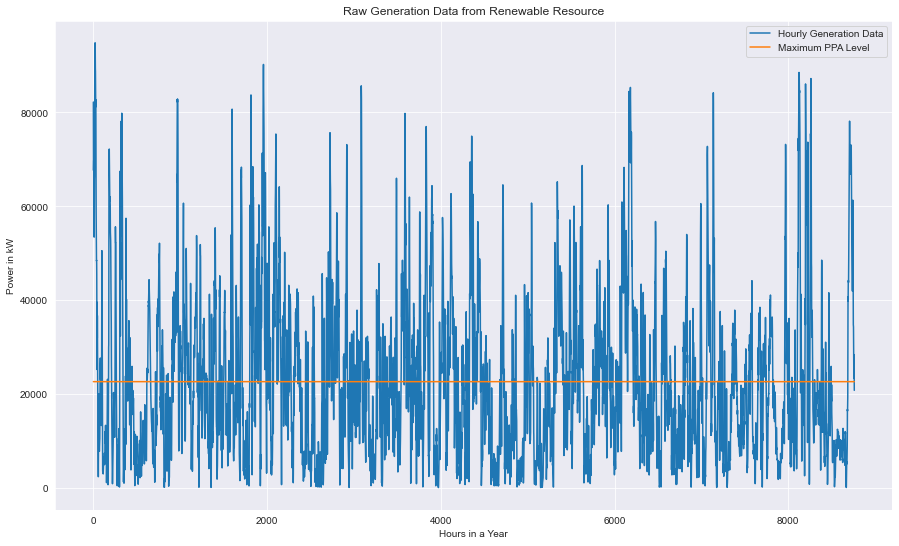

In [111]:

#maximum possible PPA
maxPPA = np.mean(generationRaw)
print("The max PPA that you can achieve with this facility is", np.ceil(maxPPA), "kW")
maxPPAline = maxPPA*np.ones(len(generationRaw))

#calculate power capacity
powerNeeded = maxPPA - np.min(generationRaw)
print("The min power capacity needed to fulfill this PPA is",np.ceil(powerNeeded), "kW")

#calculate min energy storage size 

#set maximum possible energy capacity
possibleEnergyCapacitiesCap = 10_000_000

#iterate through different initial state of charge, just for exploration. the important code is below
for initialSOC in np.linspace(0.5, 1.0, 5):

    #create an array based on the maximum possible energy capacity you set earlier
    possibleEnergyCapacities = np.arange(possibleEnergyCapacitiesCap, 0, -1_000)

    #flag to ensure feasiblity of the solution
    isFeasible = 1

    #iterate through the array of energy capacities. from highest to lowest. stop when you find a energy capacity that allows the ppa to be met the entire year
    for energyCapacity in possibleEnergyCapacities:            
        curtailedEnergy = 0  
        # energyCapacity = 3_400_000
        currentSOC = initialSOC*energyCapacity
        # print("checking", energyCapacity, "kWh with initial SOC", currentSOC/energyCapacity)
        hourCounter = 0

        #iterate through all hours of the entire year
        for generationThisHour in generationRaw:

            #if generation is more then or equal to the PPA, you are safe this hour
            if generationThisHour >= maxPPA:
                chargeStorage = generationThisHour - maxPPA
                currentSOC += chargeStorage
                if currentSOC > energyCapacity:
                    curtailedEnergy += currentSOC - energyCapacity
                    currentSOC = energyCapacity
                # print("At hour", hourCounter, "Current SOC", currentSOC)

            #if generation is less than the ppa you must deliver, you might run out of energy here. be careful
            else:
                deficit = maxPPA - generationThisHour
                currentSOC -= deficit
                # print("At hour", hourCounter, "Current SOC", currentSOC)

                #if you cannot meet the ppa, youre done. youre not feasible.
                if currentSOC < 0:
                    # print("Storage empty at hour", hourCounter)
                    isFeasible = 0
                    break
            hourCounter += 1
            # if hourCounter == 8760:
                # print(energyCapacity,"kWh is feasible!") 
        if isFeasible == 0:
            possibleEnergyCapacitiesCap = energyCapacity
            print("With initial SOC of", initialSOC ,", the min energy capacity needed to fulfill this PPA is", energyCapacity, "kWh")
            print("Curtailed Energy:", np.ceil(curtailedEnergy), "kWh")
            break
# Plot the data
plt.figure(figsize=(15, 9))
# Set up the plot using Seaborn
sns.set_style('darkgrid')

# Plot the data using Seaborn
sns.lineplot(data=generationRaw, label='Hourly Generation Data')
sns.lineplot(data=maxPPAline, label="Maximum PPA Level")
plt.title('Raw Generation Data from Renewable Resource')
plt.xlabel('Hours in a Year')
plt.ylabel('Power in kW')
plt.show()

Decide on your own PPA Level

We will use PPA of 10000kW !
The min power capacity needed to fulfill this PPA is 9912.0 kW
With initial SOC of 0.5 , the min energy capacity needed to fulfill this PPA is 555000.0 kWh
Curtailed Energy: 64151210.0 kWh
With initial SOC of 0.625 , the min energy capacity needed to fulfill this PPA is 555000.0 kWh
Curtailed Energy: 64220585.0 kWh
With initial SOC of 0.75 , the min energy capacity needed to fulfill this PPA is 555000.0 kWh
Curtailed Energy: 64289960.0 kWh
With initial SOC of 0.875 , the min energy capacity needed to fulfill this PPA is 555000.0 kWh
Curtailed Energy: 64359335.0 kWh
With initial SOC of 1.0 , the min energy capacity needed to fulfill this PPA is 555000.0 kWh
Curtailed Energy: 64428710.0 kWh


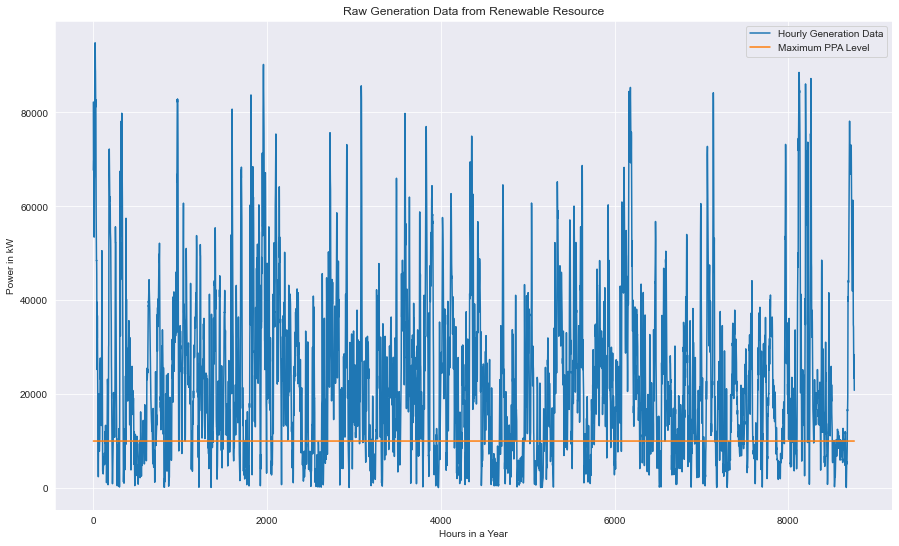

In [112]:
import pandas as pd

ppa = int(input("What PPA Level should we try for (in kW)?"))
print("We will use PPA of " + str(ppa) + "kW !")

#calculate power capacity
powerNeeded = ppa - np.min(generationRaw)
print("The min power capacity needed to fulfill this PPA is", np.ceil(powerNeeded), "kW")


#calculate min energy storage size 
possibleEnergyCapacitiesCap = 10_000_000
for initialSOC in np.linspace(0.5, 1.0, 5):
    possibleEnergyCapacities = np.arange(possibleEnergyCapacitiesCap, 0, -1_000)
    isFeasible = 1
    for energyCapacity in possibleEnergyCapacities:
        curtailedEnergy = 0            
        # energyCapacity = 3_400_000
        currentSOC = initialSOC*energyCapacity
        # print("checking", energyCapacity, "kWh with initial SOC", currentSOC/energyCapacity)
        hourCounter = 0
        for generationThisHour in generationRaw:
            #if generation is more then or equal to the PPA, you are safe this hour
            if generationThisHour >= ppa:
                chargeStorage = generationThisHour - ppa
                currentSOC += chargeStorage
                if currentSOC > energyCapacity:
                    curtailedEnergy += currentSOC - energyCapacity
                    currentSOC = energyCapacity
                # print("At hour", hourCounter, "Current SOC", currentSOC)
            #you might run out of energy here
            else:
                deficit = ppa - generationThisHour
                currentSOC -= deficit
                # print("At hour", hourCounter, "Current SOC", currentSOC)
                if currentSOC < 0:
                    # print("Storage empty at hour", hourCounter)
                    isFeasible = 0
                    break
            hourCounter += 1
            # if hourCounter == 8760:
                # print(energyCapacity,"kWh is feasible!") 
        if isFeasible == 0:
            possibleEnergyCapacitiesCap = energyCapacity
            print("With initial SOC of", initialSOC ,", the min energy capacity needed to fulfill this PPA is", np.ceil(energyCapacity), "kWh")
            print("Curtailed Energy:", np.ceil(curtailedEnergy), "kWh")
            break
        

# Plot the data
plt.figure(figsize=(15, 9))
# Set up the plot using Seaborn
sns.set_style('darkgrid')

# Plot the data using Seaborn
sns.lineplot(data=generationRaw, label='Hourly Generation Data')
sns.lineplot(data=ppa*np.ones(len(generationRaw)), label="Chosen PPA Level")
plt.title('Raw Generation Data from Renewable Resource')
plt.xlabel('Hours in a Year')
plt.ylabel('Power in kW')
plt.show()

